In [1]:
import sys
import numpy as np
import pandas as pd
from skimage.transform import rescale, resize, downscale_local_mean

import matplotlib.pyplot as plt

In [11]:
# lower case and uppercase letters, and numbers 0-9
NUMBER_OF_SYMBOLS = 26 + 26 + 10
NUMBER_OF_FONTS = 1016
ORIGINAL_IMAGE_SIZE = 128*128
NUMBER_OF_SAMPLES = NUMBER_OF_FONTS * NUMBER_OF_SYMBOLS

In [29]:
with np.load('../data/processed/character_vectors.npz') as infile:
    image_data = infile['data']
    labels = infile['labels']

In [4]:
print('Size (bytes):', sys.getsizeof(image_data))
print(image_data.dtype)

Size (bytes): 4128243824
float32


C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


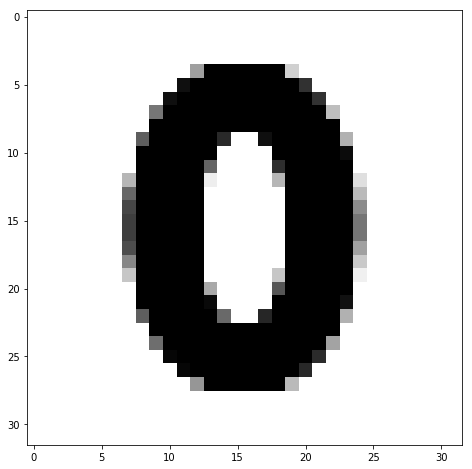

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(resize(image_data[4].reshape((128, 128)), output_shape=(32, 32)), cmap=plt.cm.gray_r)

### Prepare data for VAE

In [6]:
font_index = np.arange(1000, image_data.shape[0], NUMBER_OF_FONTS)
font_images = image_data[font_index, :].reshape((1, NUMBER_OF_SYMBOLS*ORIGINAL_IMAGE_SIZE))

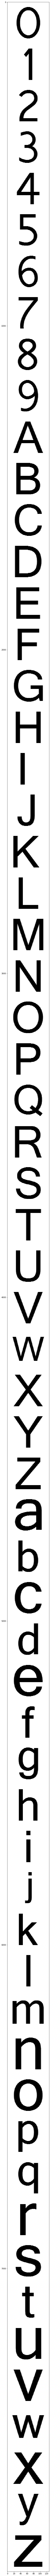

In [7]:
plt.figure(figsize=(8, 256))
plt.imshow(font_images[0].reshape((128*NUMBER_OF_SYMBOLS, 128)), cmap=plt.cm.gray_r)

In [8]:
# reshape data to be of the shape (NUMBER_OF_FONTS, NUMBER_OF_SYMBOLS * NEW_IMAGE_SIZE)
# so that every row contains all the symbols of one font

NEW_IMAGE_SIZE = 32*32

font_data = np.zeros(shape=(NUMBER_OF_FONTS, NUMBER_OF_SYMBOLS * NEW_IMAGE_SIZE), dtype='float32')

for i in range(NUMBER_OF_FONTS):
    for j in range(NUMBER_OF_SYMBOLS):
        original_image = image_data[i + j*NUMBER_OF_FONTS, :]
        rescaled_image = resize(original_image.reshape((128, 128)), output_shape=(32, 32)).ravel()
        font_data[i, (j*NEW_IMAGE_SIZE): (j + 1)*NEW_IMAGE_SIZE] = rescaled_image

C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


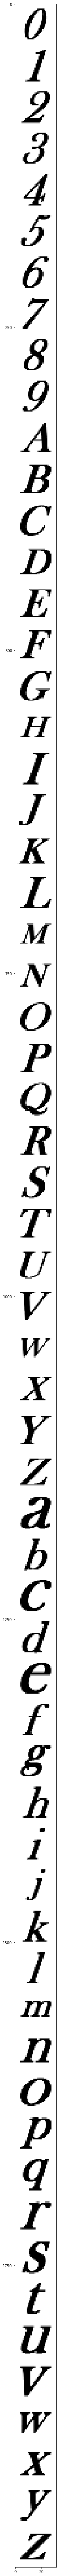

In [72]:
plt.figure(figsize=(8, 128))
plt.imshow(font_data[55, :].reshape((32*NUMBER_OF_SYMBOLS, 32)), cmap=plt.cm.gray_r)

In [73]:
np.savez('../data/processed/font_vectors_small.npz', data=font_data)

### Prepare data for GAN

In [22]:
image_data.shape

(62992, 16384)

In [27]:
# downsize images and reshape data to be of the shape (NUMBER_OF_SAMPLES, NEW_IMAGE_SIZE, NEW_IMAGE_SIZE)
# (original data is of shape (NUMBER_OF_SAMPLES, IMAGE_SIZE * IMAGE_SIZE))
# so that every "row" (2D) contains the data for one image 

NEW_IMAGE_SIZE = 32
gan_data = np.zeros(shape=(NUMBER_OF_SAMPLES, NEW_IMAGE_SIZE, NEW_IMAGE_SIZE), dtype='float32')

for i in range(NUMBER_OF_SAMPLES):
    # get original data
    original_image = image_data[i, :]
    # resize image from (128, 128) to (32, 32)
    rescaled_image = resize(original_image.reshape((128, 128)), output_shape=(32, 32))
    # add to gan data
    gan_data[i, :, :] = rescaled_image

C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\fredrik.fagerholm\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [36]:
np.unique(labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

1


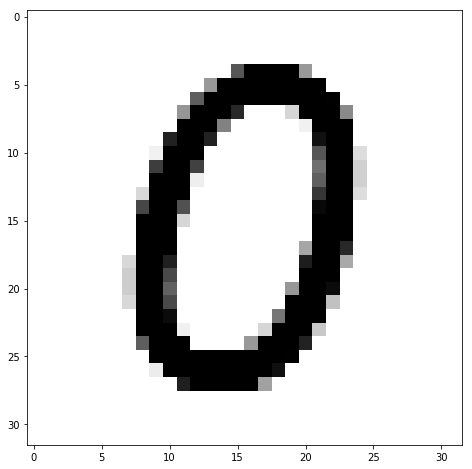

In [30]:
plt.figure(figsize=(8, 8))
print(labels[50])
plt.imshow(gan_data[50, :], cmap=plt.cm.gray_r)

In [37]:
np.savez('../data/processed/image_matrices_small.npz', data=gan_data, labels=labels)